In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
dados = pd.read_csv('/content/drive/My Drive/datasets/golf.csv', sep=';')

In [4]:
dados.head()

,clima,temp,umidade,vento,jogar
0,ensolarado,quente,alto,não,não
1,ensolarado,quente,alto,sim,não
2,nublado,quente,alto,não,sim
3,chuvoso,suave,alto,não,sim
4,chuvoso,frio,normal,não,sim


Note que as variavéis não são númericas e por padrão o Classificador não irá converter automaticamente.

Desde forma, iremos utilizar uma funcionalidade do Pandas chamada `get_dummies`. Antes de aplicar, iremos exemplificar o funcionamento dessa funcionalidade.

Considere o seguinte DataFrame:

In [5]:
df = pd.DataFrame({
    'genero': ['masculino', 'feminino'],
    'idade': [30, 25]
})
df

,genero,idade
0,masculino,30
1,feminino,25


Vamos aplicar a funcionalidade `get_dummies` no DataFrame df. Note que apenas as colunas do tipo _object_ serão utilizadas.

In [6]:
pd.get_dummies(df)

,idade,genero_feminino,genero_masculino
0,30,0,1
1,25,1,0


**Voltando ao nosso problema**

Aplica-se o `get_dummies` na base de dados de golfe. É necessário separar a coluna alvo, uma vez que iremos utilizar apenas uma coluna como alvo.

In [7]:
dados_codificado = pd.get_dummies(dados[['clima', 'temp', 'umidade', 'vento']])
dados_codificado.head()

,clima_chuvoso,clima_ensolarado,clima_nublado,temp_frio,temp_leve,temp_quente,temp_suave,umidade_alto,umidade_normal,vento_não,vento_sim
0,0,1,0,0,0,1,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,1,0,1,0
3,1,0,0,0,0,0,1,1,0,1,0
4,1,0,0,1,0,0,0,0,1,1,0


Com os dados convertidos, temos que converter também a coluna alvo para número.

Utilizando o conceito de função lambda visto em aulas anteriores, iremos converter a string não para 0 e a string sim para 1.

In [8]:
y = np.where(dados['jogar'] == "não", 0, 1)

Com os dados convertidos, iremos utilizar a biblioteca `scikit-learn` que já implementa o classificador - Árvore de Decisão.

In [9]:
from sklearn import tree

In [10]:
arvore_decisao = tree.DecisionTreeClassifier()

In [11]:
modelo_ad = arvore_decisao.fit(dados_codificado, y)

In [12]:
modelo_ad

DecisionTreeClassifier()

Note que por padrão utiliza-se o critério GINI para realizar a divisão.

### Criando a visualização da Árvore:

In [13]:
tree.export_graphviz(
    modelo_ad,
    feature_names=dados_codificado.columns.to_list(),
    class_names=['nao_jogar', 'jogar'],
    filled=True,
    rounded=True,
    out_file='tree.dot'
)

In [14]:
!dot -Tpng tree.dot -o tree.png

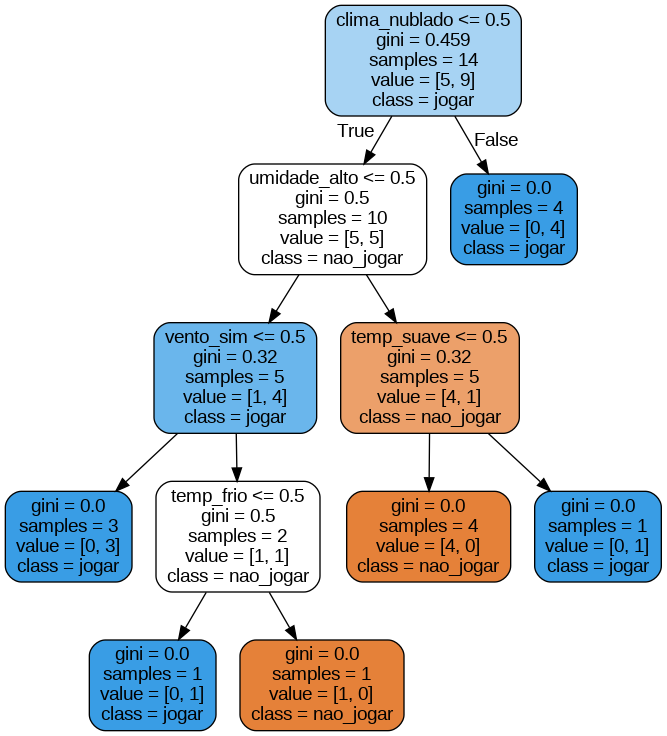

In [15]:
from IPython.display import Image

Image('tree.png')

In [16]:
print(tree.export_text(modelo_ad, feature_names=dados_codificado.columns.to_list()))

|--- clima_nublado <= 0.50
|   |--- umidade_alto <= 0.50
|   |   |--- vento_sim <= 0.50
|   |   |   |--- class: 1
|   |   |--- vento_sim >  0.50
|   |   |   |--- temp_frio <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- temp_frio >  0.50
|   |   |   |   |--- class: 0
|   |--- umidade_alto >  0.50
|   |   |--- temp_suave <= 0.50
|   |   |   |--- class: 0
|   |   |--- temp_suave >  0.50
|   |   |   |--- class: 1
|--- clima_nublado >  0.50
|   |--- class: 1

